<a href="https://colab.research.google.com/github/NgHuiLingIris/snake-engine/blob/master/Pulsar_Star_Using_a_Trained_Deep_Learning_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using a Trained Deep Learning Neural Network Example

In [0]:
from keras.applications import VGG16

vgg16 = VGG16()
print(vgg16.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
# update this path to your own image
path = 'pulsarstar.jpg'

In [0]:
def resize_and_crop_image(image_path, width, height):
    """Resizes and crops an image to the desired size
    Args:
        image_path: path to the image
        width: image width
        height: image height
    Returns:
        the resulting image
    """
    from PIL import Image, ImageOps
    
    img = Image.open(image_path)
    img = ImageOps.fit(img, (width, height))
    return img

In [0]:
# Preprocess image input
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input, decode_predictions

img = resize_and_crop_image(path, 224, 224)
x = img_to_array(img)
x = preprocess_input(x)
print('Original image shape:', x.shape)

# The model expect images in a batch, because it's trained that way
# Add an extra first axis
x = np.expand_dims(x, axis=0)
print('Expected input shape', x.shape)

Original image shape: (224, 224, 3)
Expected input shape (1, 224, 224, 3)


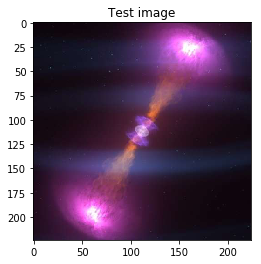

Decoded predictions:
40960/35363 [==================================] - 0s 0us/step
[[('n04286575', 'spotlight', 0.57565236), ('n06874185', 'traffic_light', 0.15130483), ('n04296562', 'stage', 0.0771083), ('n03388043', 'fountain', 0.05616172), ('n04456115', 'torch', 0.023522625)]]


In [0]:
import matplotlib.pyplot as plt

y = vgg16.predict(x)

# display the image
plt.imshow(img, interpolation='nearest')
plt.title('Test image')
plt.show()

# display the predictions
#print('Raw predictions:')
#print(y)

print('Decoded predictions:')
print(decode_predictions(y, top=5))